In [1]:
%matplotlib ipympl

In [2]:
import scipy.optimize as so
import csv
import numpy as np
from impedance.preprocessing import readGamry
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt

In [5]:
dta_file_path1="kaushik_file.DTA"
f,Z =readGamry(dta_file_path1)
# print(Z)

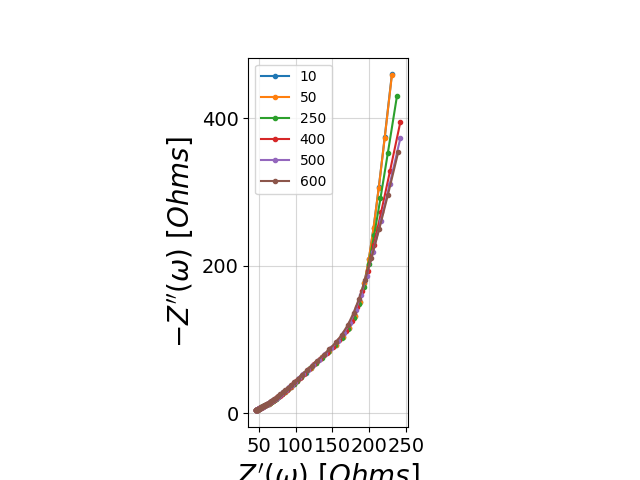

In [3]:
# Specify the path to your CSV file

fig, ax= plt.subplots()
v_pertb=[10,50,250,400,500,600]
#adding mV to the end of mV values 

for i in range(1,7):
    dta_file_path = f'EISPOT_#{i}.DTA'
    f,Z =readGamry(dta_file_path)
    plot_nyquist(Z,ax=ax)
ax.legend(v_pertb)

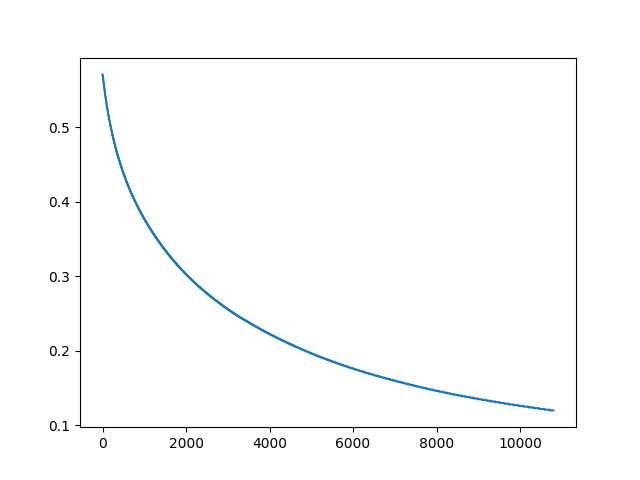

In [4]:
import pandas as pd
csv_file_path = 'OCV_10mv_3hrs.csv'

df = pd.read_csv(csv_file_path)

column_arrays = {}
for column in df.columns:
    column_arrays[column] = df[column].values

# Now, 'column_arrays' is a dictionary where keys are column names, and values are Python arrays
# You can access the arrays using the column names, for example, column_arrays['ColumnName']
t=df["time"].values
V=df["V"].values
# Example: Print the arrays

fig2, ax2= plt.subplots()

ax2.plot(t,V)




C 0.01340192051491276
i0 45.06859767122691
tau 689485.9035452161
alpha 0.21836316724382468


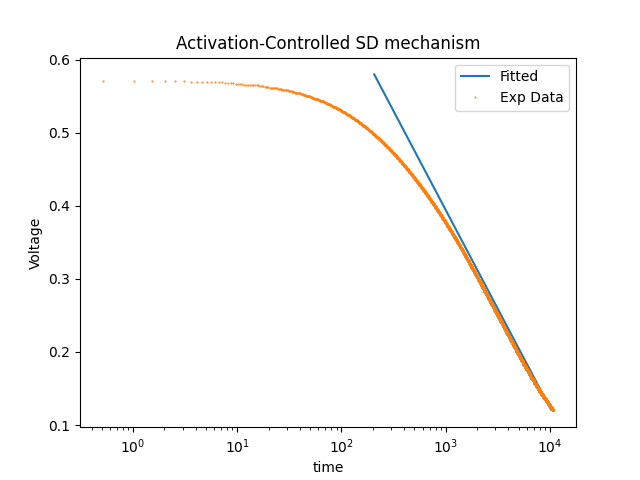

In [11]:
def AC_func(t,C,i0,tau,alpha):
    #Parameters To be Fitted/Found
    #C,i0,tau

    #Constants
    R=8.314 #J/(molK)
    T=298 #K
    # alpha=0.5
    F=96500 #Columbs/Mol

    V=(R*T/(alpha*F))*np.log(alpha*F*i0/(R*T*C))-(R*T/(alpha*F))*np.log(t+C*tau/i0)
    return V

xdata=t
ydata=V

# func(100,1e-3,1e-3,10)
popt, pcov=so.curve_fit(AC_func,xdata,ydata,bounds=(0,[np.inf,np.inf,np.inf,1]))
popt

x=np.logspace(0,4,100)
V1=AC_func(x,popt[0],popt[1],popt[2],popt[3])

fig22, ax3= plt.subplots()
ax3.plot(x+popt[0]*popt[2]/popt[1],V1)
ax3.plot(xdata,ydata,".",ms=1)
ax3.legend(["Fitted","Exp Data"])
ax3.set_xlabel("time")
ax3.set_xscale("log")
ax3.set_ylabel("Voltage")
ax3.set_title("Activation-Controlled SD mechanism")

print("C",popt[0])
print("i0",popt[1])
print("tau",popt[2])
print("alpha",popt[3])




Rle 55.37076574546745
Cdl 121.91743023105445
V0 0.4392433946720052


Text(0.5, 1.0, 'Leakage-Controlled SD mechanism')

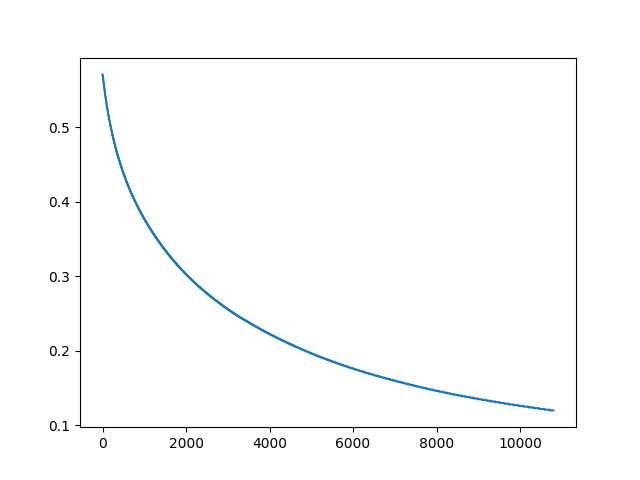

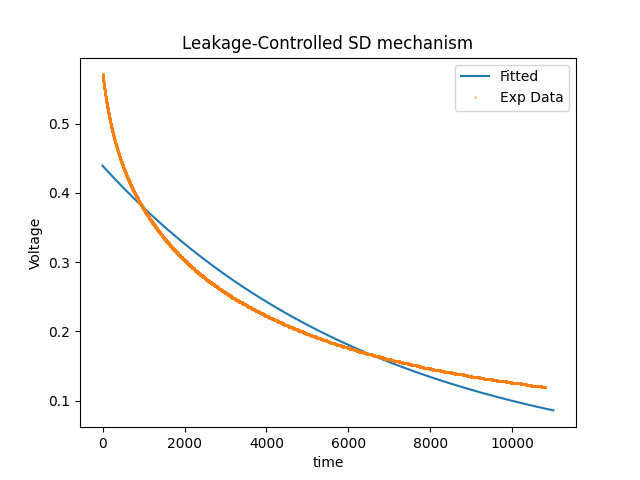

In [12]:
def LC_func(t,Rle,Cdl,V0):
    V=np.exp(np.log(V0)-t/(Rle*Cdl))
    return V

popt, pcov=so.curve_fit(LC_func,xdata,ydata,bounds=(0,[np.inf,np.inf,np.inf]))
print("Rle",popt[0]) 
print("Cdl",popt[1]) 
print("V0",popt[2])

_,ax=plt.subplots()

ax.plot(xdata,ydata)

x=np.linspace(1,11000,100)
V1=LC_func(x,popt[0],popt[1],popt[2])

fig22, ax3= plt.subplots()
ax3.plot(x,V1)
ax3.plot(xdata,ydata,".",ms=1)
ax3.legend(["Fitted","Exp Data"])
ax3.set_xlabel("time")
ax3.set_ylabel("Voltage")
ax3.set_title("Leakage-Controlled SD mechanism")